In [5]:
#1.Data collection
# import the required libraries
import pandas as pd
import numpy as np
# load the data set
df = pd.read_csv("covid-data.csv")
#data preview
df.head


<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan    1/3/2020          NaN        0.0   
1           AFG      Asia  Afghanistan    1/4/2020          NaN        0.0   
2           AFG      Asia  Afghanistan    1/5/2020          NaN        0.0   
3           AFG      Asia  Afghanistan    1/6/2020          NaN        0.0   
4           AFG      Asia  Afghanistan    1/7/2020          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  10/14/2023     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  10/15/2023     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  10/16/2023     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  10/17/2023     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  10/18/2023     265808.0        0.0   

        new_cases_smoothed  total

In [13]:
#.2 Data exploration
# check columns
df.columns
# Rows preview
df.head()




,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [14]:
# #.missing values
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
                                            ...  
new_deaths_per_million                       9574
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [66]:
# data cleaning
#Convert date column to datetime: pd.to_datetime()
df.loc[:, "date"] = pd.to_datetime(df["date"])
#Filter countries of interest (e.g., Kenya, USA, India).
countries = ["Kenya","Spain","India","South Korea","Australia"]
df_selected = df[df["location"].isin(countries)]
# Drop rows with missing dates/critical values.
critical_columns =["total_deaths","total_cases","location","population"]
df.dropna(subset=critical_columns)
# Sort by date (important for interpolation)
df = df.sort_values("date")

# Interpolate missing numeric values
df = df.interpolate(method='linear')

# Optional: Fill any remaining NaNs with 0
df = df.fillna(0)
# Final check
print(df.isnull().sum())




iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64


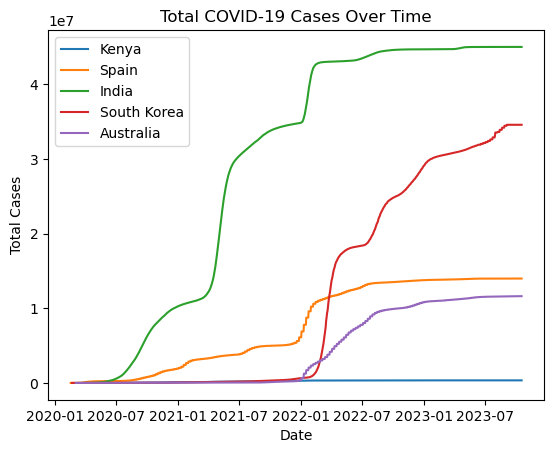

In [112]:
# Data exploration

import matplotlib.pyplot as plt
import seaborn as sns
#Plot total cases over time for selected countries.
for country in countries:
    subset = df_selected[df_selected['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()

    

In [113]:
print(df[df["location"] == "US"].isnull().sum())


   

iso_code                                   0.0
continent                                  0.0
location                                   0.0
date                                       0.0
total_cases                                0.0
                                          ... 
excess_mortality_cumulative_absolute       0.0
excess_mortality_cumulative                0.0
excess_mortality                           0.0
excess_mortality_cumulative_per_million    0.0
death_rate                                 0.0
Length: 68, dtype: float64


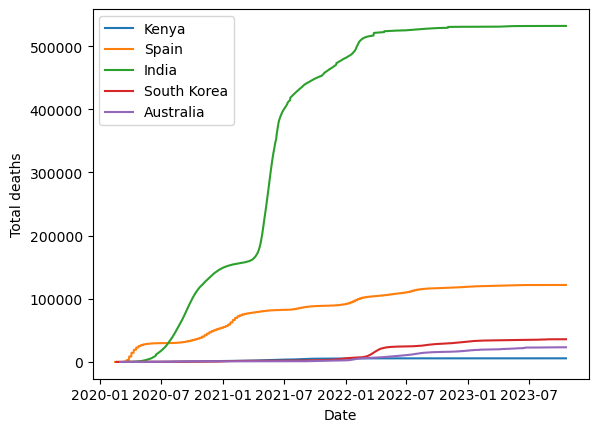

In [73]:
# Total death overtime
for country in countries:
    subset = df_selected[df_selected["location"] == country]
    plt.plot(subset["date"], subset["total_deaths"], label=country)
    plt.ylabel("Total deaths")
    plt.xlabel("Date")
    plt.legend()

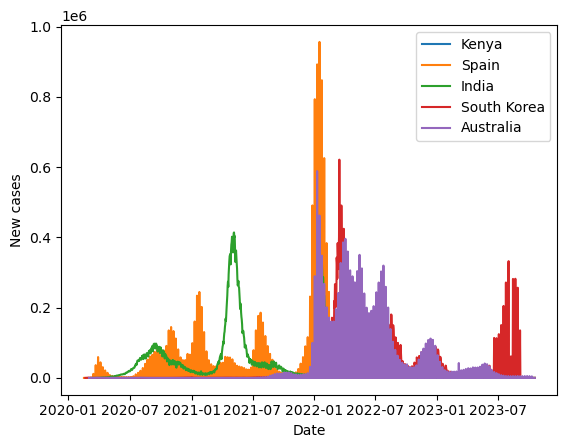

In [75]:
# new cases between countries
for country in countries:
    subset = df_selected[df_selected["location"] == country]
    plt.plot(subset["date"], subset["new_cases"], label=country)
    plt.ylabel("New cases")
    plt.xlabel("Date")
    plt.legend()


,location,people_fully_vaccinated_per_hundred
293501,South Korea,76.415625
159171,Kenya,74.680000
19404,Australia,64.760000
141157,India,67.170000
296271,Spain,74.986875


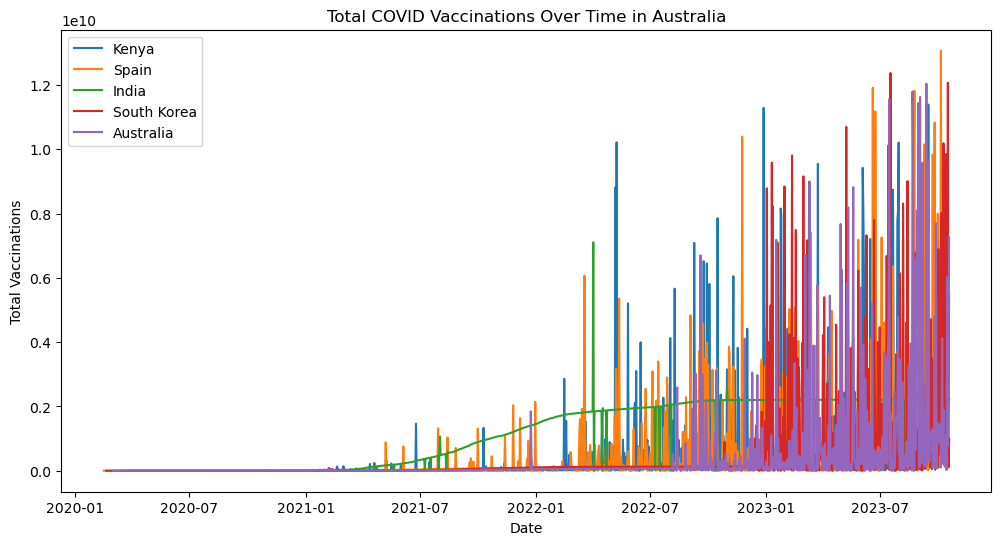

In [105]:
#5.vaccinations Visualization
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_selected[df_selected['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title(f"Total COVID Vaccinations Over Time in {country}")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()

# Latest % vaccinated population
latest_data = df_selected.sort_values('date').groupby('location').tail(1)
latest_data[['location', 'people_fully_vaccinated_per_hundred']]


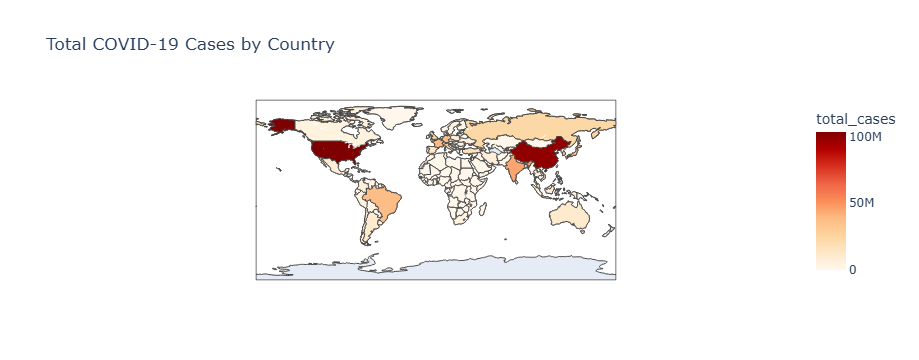

In [111]:
#Optional: Build a Choropleth Map
import plotly.express as px

import plotly.express as px

# Get latest data for all countries
latest_global = df.sort_values('date').groupby('location').tail(1)

# Filter out rows without iso_code or cases
latest_global = latest_global[latest_global['iso_code'].str.len() == 3]
latest_global = latest_global[~latest_global['total_cases'].isna()]
# choropleth map
fig = px.choropleth(latest_global,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='OrRd',
                    title='Total COVID-19 Cases by Country')
fig.show()


In [ ]:
#7. Key Insights
#India has the highest COVID-19 cases overtime and Kenya the lowest
# India also has the highest deaths and Kenya the lowest
# Based on cases by country, China and North America was the most affected. It is interesting that Africa was the least affected compares to first-world countries
# Regarding new cases, India experienced massive spikes mid-2021, Spain shows multiple signficant spikes, and was highest in 2022
# Kenya demonstrates comparatively lower and fewer peaks, which either reveals low reporting levels, smaller waves orlower cases
